In [18]:
# Enable autocomplete
%config IPCompleter.greedy=True

# 🧮 Data Science Basics: Statistics, Normalization, and Similarity (Balanced Classroom Version)

This classroom notebook mixes **conceptual explanations** with **applied advice** and hands-on exercises.
Work through the exercises, then reveal solutions to check your understanding.

Sections:
1. Simple descriptive statistics (what to compute and why)
2. Normalization vs standardization (mathematical idea + when to use)
3. Similarity & distance metrics (intuition, formulas, and use-cases)
4. Visual diagnostics and practical tips


---
## 1️⃣ Simple Descriptive Statistics — what and why

Descriptive statistics summarize data so you can form hypotheses and choose preprocessing/modeling steps.

- **Mean** and **median**: central tendency. Mean is sensitive to outliers; median is robust.
- **Variance / standard deviation**: how spread out values are (units squared for variance).
- **Covariance / correlation**: relationships between pairs of variables. Covariance depends on units; correlation is unitless and scaled to [-1,1].

Practical tip: always inspect these before modeling — they reveal scale differences and potential collinearity.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

data = pd.DataFrame({
    'height_cm': [160, 165, 170, 175, 180, 185, 190],
    'weight_kg': [55, 60, 65, 70, 75, 80, 85],
    'age_years': [20, 22, 25, 28, 30, 35, 40]
})
data.head()

,height_cm,weight_kg,age_years
0,160,55,20
1,165,60,22
2,170,65,25
3,175,70,28
4,180,75,30


In [20]:
data.describe()

,height_cm,weight_kg,age_years
count,7.000000,7.000000,7.000000
mean,175.000000,70.000000,28.571429
std,10.801234,10.801234,7.114706
min,160.000000,55.000000,20.000000
25%,167.500000,62.500000,23.500000
50%,175.000000,70.000000,28.000000
75%,182.500000,77.500000,32.500000
max,190.000000,85.000000,40.000000


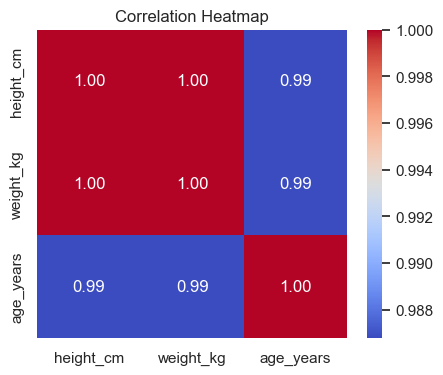

In [21]:
plt.figure(figsize=(5,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### ✏️ Exercise 1
1. Compute the **mean** and **variance** of `height_cm` (use sample variance, `ddof=1`).
2. Compute the **covariance** between `height_cm` and `weight_kg`.

> **Why this matters (balanced view):**
> - Mean and variance tell you the *scale* of a feature — important for distance metrics.
> - Covariance hints at whether two features move together; if correlation is very high, consider dimensionality reduction or dropping redundant features.

In [46]:
# --- Student area: implement these ---
height_mean = np.mean(data["height_cm"])
height_var = np.var(data["height_cm"])
cov_hw = np.cov(data["height_cm"],data["weight_kg"])
print(f"Mean height: {height_mean:.2f} cm")
print(f"Variance of height: {height_var:.2f}")
print("Convariance matrix : ")
print(cov_hw)


Mean height: 175.00 cm
Variance of height: 100.00
Convariance matrix : 
[[116.66666667 116.66666667]
 [116.66666667 116.66666667]]


#### Feedback and interpretation

- If the **variance** is **large relative to other features**, that **feature will dominate Euclidean-type distances unless you scale it**.
- **Covariance sign** indicates **direction of relationship**; **correlation magnitude indicates strength**
    * 0.0 → no linear relation
    * ±1.0 → perfect linear relation.

| Medida      | O que indica o Sinal (+ ou -) | O que indica a Magnitude (Valor)     |
| :---        |    :----:   |          :--- |
| **Covariância**      | A direção da relação: <br> **+**: Mover-se na mesma direção (↑↑ ou ↓↓). <br> **-**: Mover-se em direções opostas (↑↓ ou ↓↑).  |   Não é padronizada, difícil de interpretar a força <br> (Se **positiva**, a **relação é direta**; se **negativa**, **é inversa**). |
| **Correlação**   | A direção da relação (mesmo que a Covariância).        | 	A **força** e **perfeição** da relação linear:<br>**≈0.0**: **Nenhuma relação linear**.<br>**≈±1.0**: **Relação linear perfeita** (forte).      |

## 2️⃣ Normalization vs Standardization — concept + applied guidance

**Mathematical idea:**
- **Normalization** (Min–Max): transforms `x` to `(x - min) / (max - min)`; range becomes [0,1].
- **Standardization (z-score)**: transforms `x` to `(x - mean) / std`; mean→0, std→1.

**When to use which (balanced guidance):**
- Use **normalization** when you need bounded features (e.g., image pixel intensities for neural networks, or when you want features on the same finite scale).
- Use **standardization** for algorithms that assume centered data or rely on variance (e.g., PCA, linear models, SVM). It's often a safe default.
- For **distance-based** algorithms (k-NN, k-means), either is fine — but **do scale**. If features have outliers, robust scalers (median/IQR) can be better.

Practical tip: always **fit** scalers on training data only and **apply** to validation/test sets to avoid leakage.

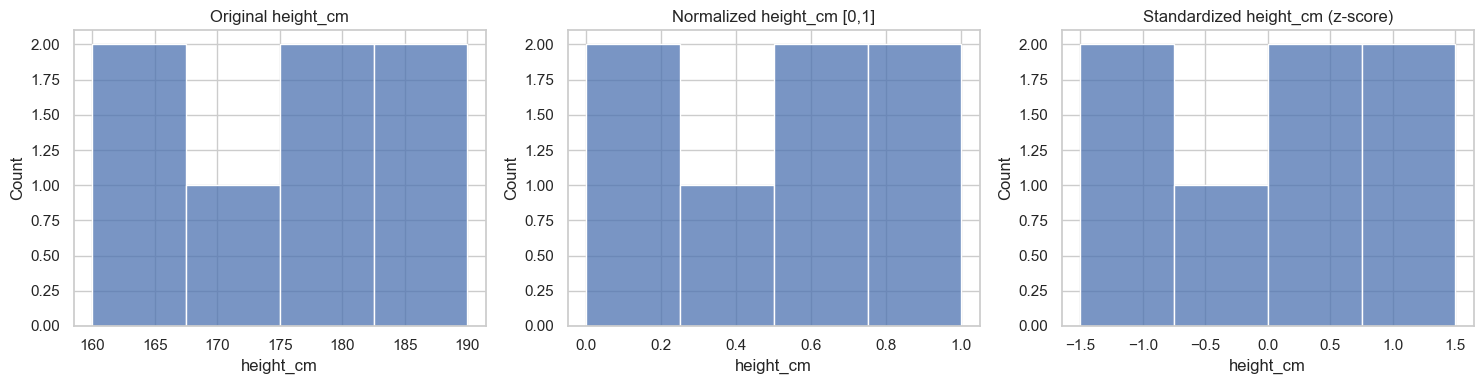

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization
scaler_norm = MinMaxScaler()
data_norm = pd.DataFrame(scaler_norm.fit_transform(data), columns=data.columns)

# Standardization
scaler_std = StandardScaler()
data_std = pd.DataFrame(scaler_std.fit_transform(data), columns=data.columns)

fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.histplot(data['height_cm'], kde=False, ax=axes[0])
axes[0].set_title('Original height_cm')
sns.histplot(data_norm['height_cm'], kde=False, ax=axes[1])
axes[1].set_title('Normalized height_cm [0,1]')
sns.histplot(data_std['height_cm'], kde=False, ax=axes[2])
axes[2].set_title('Standardized height_cm (z-score)')
plt.tight_layout()
plt.show()

### ✏️ Exercise 2
1. Compute the mean and standard deviation for each feature before and after standardization.
2. Explain briefly (one sentence each) how the change affects distance calculations.

> Hint: use `.mean()` and `.std()` on DataFrames.

In [50]:
# Student area
original_means = data.mean()
standardized_means = data_std.mean()
original_stds = data.std()
standardized_stds = data_std.std()
print("Original Mean vs Standardized Mean")
print(original_means)
print(standardized_means)
print("Original Standard Deviation vs Standardized Standard Deviation")
print(original_stds)
print(standardized_stds)

Original Mean vs Standardized Mean
height_cm    175.000000
weight_kg     70.000000
age_years     28.571429
dtype: float64
height_cm    0.000000e+00
weight_kg    0.000000e+00
age_years   -1.586033e-16
dtype: float64
Original Standard Deviation vs Standardized Standard Deviation
height_cm    10.801234
weight_kg    10.801234
age_years     7.114706
dtype: float64
height_cm    1.080123
weight_kg    1.080123
age_years    1.080123
dtype: float64


#### Balanced interpretation
- **After standardization**, each **feature contributes roughly equally to Euclidean distances** (assuming features were roughly Gaussian). **This prevents large-scale features from dominating**.
- **Normalization** **preserves relative distances but bounds them**
    * it is sensitive to new data outside the training range (can produce values <0 or >1 if not handled).


## 3️⃣ Similarity & Dissimilarity Metrics — intuition and applications

* **Euclidean distance** (L2): straight-line distance in feature space. 
    * Good when:
        * **Magnitude differences matter**
        * **Features are scaled appropriately**

* **Manhattan distance** (L1): sum of absolute differences.
    * **More robust to single-coordinate outliers** and often **yields different cluster shapes**.

* **Cosine dissimilarity**:
    * **1 - cosine_similarity = 1 - (a·b / (||a|| ||b||))**.
    * Measures angle between vectors
    * Ignores magnitude.
    * Very useful for text (TF-IDF) and high-dimensional sparse data.

* ```Practical rule```:

    * If your **data represent counts or frequency vectors** (text, user-item interactions), try **cosine**.
    * If **physical measurements**, try **Euclidean** (**after scaling**).

In [63]:
from scipy.spatial.distance import euclidean, cityblock, cosine, pdist, squareform
x = data_std.iloc[0] # first row 

y = data_std.iloc[-1] # last row 
print(data_std)
print(f'Euclidean distance: {euclidean(x,y):.4f}')
print(f'Manhattan distance: {cityblock(x,y):.4f}')
print(f'Cosine dissimilarity: {cosine(x,y):.4f}')

   height_cm  weight_kg  age_years
0       -1.5       -1.5  -1.301277
1       -1.0       -1.0  -0.997645
2       -0.5       -0.5  -0.542199
3        0.0        0.0  -0.086752
4        0.5        0.5   0.216879
5        1.0        1.0   0.975957
6        1.5        1.5   1.735035
Euclidean distance: 5.2172
Manhattan distance: 9.0363
Cosine dissimilarity: 1.9909


### ✏️ Exercise 3
1. Implement a function that returns Euclidean, Manhattan and Cosine distances between any two rows of a DataFrame.
2. Compare results for raw vs standardized data and write one sentence on what changed and why.

Hint: use `scipy.spatial.distance` functions like `euclidean`, `cityblock`, and `cosine`.

In [73]:
# Student area
def compare_distances(df, i, j):
    a = df.iloc[i]
    b = df.iloc[j] 
    return { "euclidean": euclidean(a,b), "cityblock": cityblock(a,b), "cosine": cosine(a,b) }
raw = compare_distances(data, 0, 6)
std = compare_distances(data_std, 0, 6)
print("Distances without standardization")
print(raw)
print("Distances with standardization")
print(std)

Distances without standardization
{'euclidean': np.float64(46.9041575982343), 'cityblock': np.int64(80), 'cosine': np.float64(0.006513997379264391)}
Distances with standardization
{'euclidean': 5.217201449911225, 'cityblock': np.float64(9.036312067122843), 'cosine': np.float64(1.9908570672941515)}


In [74]:
# 2. Compare results for raw vs standardized data and write one sentence on what changed and why
if std['euclidean'] < raw['euclidean']:
    print('✅ Scaling reduced Euclidean distance magnitude — standardized space compresses scale differences.')
else:
    print('⚠️ Unexpected: check your scaling or distance implementation.')

✅ Scaling reduced Euclidean distance magnitude — standardized space compresses scale differences.


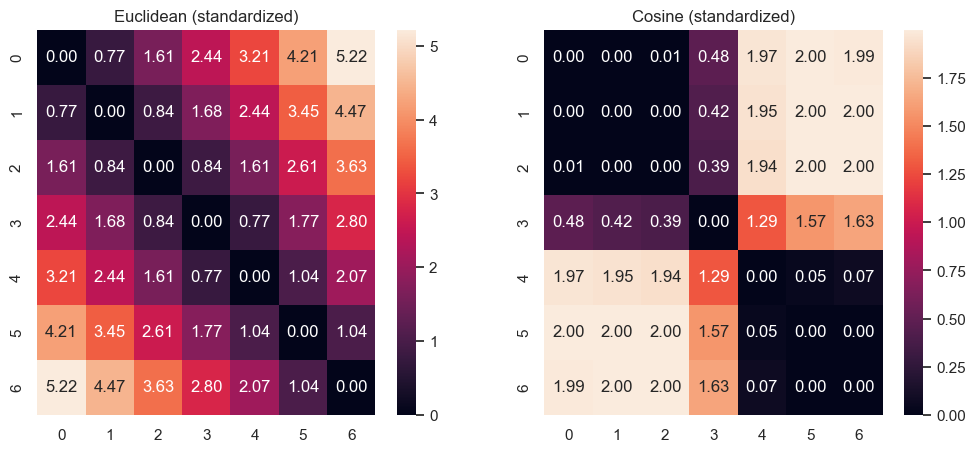

In [75]:
# Pairwise distance heatmaps (visual diagnostic)
euclidean_matrix = squareform(pdist(data_std, metric='euclidean'))
cosine_matrix = squareform(pdist(data_std, metric='cosine'))
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(euclidean_matrix, ax=axes[0], annot=True, fmt='.2f').set_title('Euclidean (standardized)')
sns.heatmap(cosine_matrix, ax=axes[1], annot=True, fmt='.2f').set_title('Cosine (standardized)')
plt.show()

## 4️⃣ Visual diagnostics and practical tips (balanced)

- **Boxplots / histograms** before and after scaling show how distributions change and whether outliers remain problematic.
- **Correlation heatmap** helps spot multicollinearity — if two features correlate near ±1, you may drop or combine them.
- **Distance heatmaps** quickly show which pairs are similar/dissimilar; use them as sanity checks for clustering.

Quick checklist before using distance-based models:
1. Inspect scales (means/stds)
2. Choose a scaler and fit it only on training data
3. Decide distance metric according to data type (cosine for angles/counts, Euclidean for measurements)
4. Visualize pairwise distances and distributions


### ✅ Summary (balanced)
- Compute simple stats to understand scale and relationships.
- Standardize or normalize to make features comparable — standardization is a safe default for many ML tasks.
- Choose distance/similarity metrics aligned with your data semantics (magnitude vs angle).
- Use visual diagnostics to validate preprocessing choices.
